In [1]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import sklearn.model_selection as cross_validation
boston = load_boston()


In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [6]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']


In [7]:
print(boston.data.shape)

(506, 13)


In [8]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


0.6907204895962082


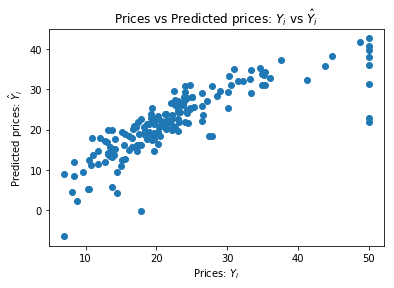

In [10]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn import linear_model 
import matplotlib.pyplot as plt

#lm = LinearRegression()
lm = linear_model.SGDRegressor(loss='squared_loss',max_iter=1000, tol=1e-2,alpha=.0001,penalty='l2')
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
print(r2_score(Y_test,Y_pred))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

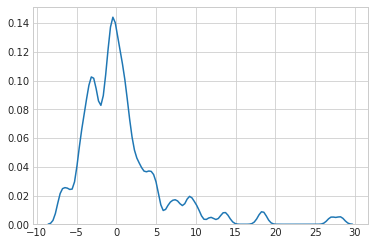

In [11]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


In [12]:
lm.intercept_

array([22.53855883])

In [13]:
lm.coef_

array([-1.22298212,  0.71816566, -0.49322568,  0.20999819, -1.28533798,
        2.89252833, -0.40876629, -2.59454222,  1.74876241, -1.05393844,
       -2.09988156,  1.04750408, -3.30453385])

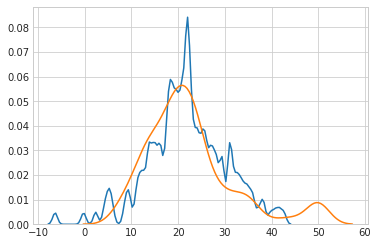

In [14]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
sns.kdeplot(np.array(Y_test))
plt.show()

<h3>My SGD Implementation<h3>

In [15]:

# Took reference from machinelearningmastery.com
import numpy as np
from tqdm import tqdm
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        #print(row[i])
        yhat += coefficients[i + 1] * row[i]
    return yhat

def next_batch(X, batchSize):
    X = np.array(X)
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize])

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in tqdm(range(n_epoch)):
        sum_error = 0
        for batchX in next_batch(train,2):
            for row in batchX:
                #print(row)
                
                yhat = predict(row, coef)
                yhat = int(yhat)
                error = int(yhat - row[-1])
                
                sum_error += error**2
                coef[0] = coef[0] - l_rate * error
                for i in range(len(row)-1):
                    gradient = error * row[i]
                    coef[i + 1] = coef[i + 1] - l_rate * gradient
                coef = [round(n,3) for n in coef]    
                #print(coef)
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

# Calculate coefficients
my_tr = []
my_tst = []
from pandas import DataFrame as df
my_train, my_test= cross_validation.train_test_split(bos, test_size = 0.33, random_state = 5)
sd_train=(my_train-my_train.mean())/my_train.std()
sd_test = (my_test-my_train.mean())/my_train.std()
#print(sd_train.iloc[0])
for i in range(len(sd_train)):
    my_tr.append(list(sd_train.iloc[i]))
for i in range(len(sd_test)):
    my_tst.append(list(sd_test.iloc[i]))
l_rate = .01
n_epoch = 10000
coef = coefficients_sgd(my_tr, l_rate, n_epoch)
print(coef)

100%|██████████| 10000/10000 [03:55<00:00, 42.45it/s]

>epoch=9999, lrate=0.010, error=47.000
[0.19, -0.133, 0.008, 0.077, 0.128, -0.549, 0.304, -0.192, -0.59, 0.479, -0.327, -0.431, 0.221, -0.533]


In [16]:
ans = []
for i in my_tst:
    ans.append(predict(i,coef))

In [17]:
ans = np.array(ans)

In [18]:
final = (ans * my_train.std()[-1] ) + my_train.mean()[-1]


Accuracy :  0.5373386772996959


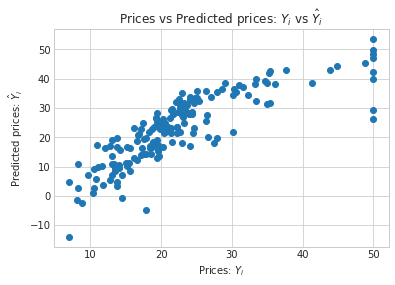

In [19]:

print("Accuracy : ",r2_score(Y_test,final))
plt.scatter(Y_test,final)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

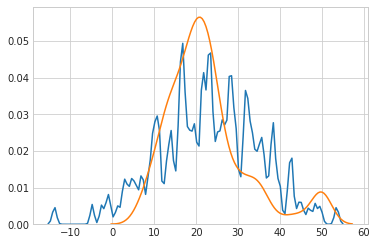

In [20]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(final), bw=0.5)
sns.kdeplot(np.array(Y_test))
plt.show()

In [21]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","Accuracy"]

x.add_row(["SKLearn",".6907"])
x.add_row(["My_Version",".5373"])

# The closer to 1 the better the accuracy.
print(x)

+------------+----------+
|   Model    | Accuracy |
+------------+----------+
|  SKLearn   |  .6907   |
| My_Version |  .5373   |
+------------+----------+


In [22]:
c = [round(n,3) for n in list(lm.coef_)] 
print("SKlearn Coef : ",c)
print("My_Model Coef : ",coef[1:])

SKlearn Coef :  [-1.223, 0.718, -0.493, 0.21, -1.285, 2.893, -0.409, -2.595, 1.749, -1.054, -2.1, 1.048, -3.305]
My_Model Coef :  [-0.133, 0.008, 0.077, 0.128, -0.549, 0.304, -0.192, -0.59, 0.479, -0.327, -0.431, 0.221, -0.533]


In [23]:
print("SKlearn Intercept : ",round(lm.intercept_[0],3))
print("My_Model Intercept : ",coef[0])

SKlearn Intercept :  22.539
My_Model Intercept :  0.19


<h3>Error Comparision:</h3>

In [24]:
mse_my = mean_squared_error(Y_test,final)
rmse_my = sqrt(mse_my)
a = mse_my/rmse_my

mse_sklearn = mean_squared_error(Y_test, Y_pred)
rmse_sklearn = sqrt(mse_sklearn)
b = mse_sklearn/rmse_sklearn

y = PrettyTable()

y.field_names = ["Model","MSE/RMSE"]

y.add_row(["SKLearn",b])
y.add_row(["My_Version",a])

print(y)

+------------+--------------------+
|   Model    |      MSE/RMSE      |
+------------+--------------------+
|  SKLearn   | 5.384519879321402  |
| My_Version | 6.5857161399370705 |
+------------+--------------------+
